### DSCI 100 008 Final Project
# Title: What it takes to be Ballin': An analysis of NBA player statistics and their effect on salary.

### Group 33: Paul Daoud | Ahnaf Kabir | Shawn Gabriel | Jackie Crowley

### Introduction

### Method and Results

#### Importing Libraries
We used functions from the `tidyverse` library to manipulate data frames and use KNN algorithms. 

In [1]:
# importing libraries
library(tidyverse)
library(dplyr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
library(reshape2)


Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




In [3]:
library(rsample)

In [4]:
library(parsnip)

Overall Plan for the project:

### 1. Data Cleaning and Preprocessing:
- Check for missing values (none)
- Index column can be removed
- Ensure all data types are appropriate for analysis
### 2. Exploratory Data Analysis (EDA):
- Examine the distribution of key variables like salary, age, and performance metrics
- Look for any outliers or anomalies
- Exploratory Data Analysis (EDA): This would involve creating visualizations to understand the distribution of salaries, the relationship between different performance metrics and salary, etc.
### 3. Correlation Analysis:
- Investigate the correlation between different performance metrics and salaries (correlation matrix)
- Identify top prospects for good salary predictors
### 4. Feature Selection:
- Based on the EDA and correlation analysis, select relevant features for modeling.
- Consider excluding columns that may not contribute to the prediction of salary
### 5. Modelling:
- Regression models, start with linear regression and then see if more complex ones are necessary
### 6. Model Evaluation:
- Evaluate model's performance with RMSE
- Check for underfitting or overfitting

### 1. Data Cleaning and Preprocessing:
- Check for missing values (none)
- Index column can be removed
- Ensure all data types are appropriate for analysis

To begin, we want to set the seed for reproducability, and load our dataset into the NBA_salary_data object.

In [5]:
set.seed(1234)

NBA_salary_data <- read.csv("nba_players_stats_with_salary.csv")

head(NBA_salary_data)
str(NBA_salary_data)
summary(NBA_salary_data)

,X,Player.Name,Salary,Position,Age,Team,GP,GS,MP,FG,⋯,TOV.,USG.,OWS,DWS,WS,WS.48,OBPM,DBPM,BPM,VORP
,<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,Stephen Curry,48070014,PG,34,GSW,56,56,34.7,10.0,⋯,12.5,31.0,5.8,2.0,7.8,0.192,7.5,0.1,7.5,4.7
2,1,John Wall,47345760,PG,32,LAC,34,3,22.2,4.1,⋯,17.1,27.0,-0.4,0.7,0.3,0.020,-0.8,-0.4,-1.2,0.1
3,2,Russell Westbrook,47080179,PG,34,LAL/LAC,73,24,29.1,5.9,⋯,18.4,27.7,-0.6,2.6,1.9,0.044,0.3,-0.1,0.2,1.2
4,3,LeBron James,44474988,PF,38,LAL,55,54,35.5,11.1,⋯,11.6,33.3,3.2,2.4,5.6,0.138,5.5,0.6,6.1,4.0
5,4,Kevin Durant,44119845,PF,34,BRK/PHO,47,47,35.6,10.3,⋯,13.4,30.7,4.7,2.1,6.8,0.194,6.0,1.2,7.1,3.9
6,5,Bradley Beal,43279250,SG,29,WAS,50,50,33.5,8.9,⋯,12.9,29.2,2.2,1.2,3.4,0.099,2.9,-1.2,1.8,1.6


'data.frame':	467 obs. of  52 variables:
 $ X            : int  0 1 2 3 4 5 6 7 8 9 ...
 $ Player.Name  : chr  "Stephen Curry" "John Wall" "Russell Westbrook" "LeBron James" ...
 $ Salary       : int  48070014 47345760 47080179 44474988 44119845 43279250 42492492 42492492 42492492 42492492 ...
 $ Position     : chr  "PG" "PG" "PG" "PF" ...
 $ Age          : int  34 32 34 38 34 29 31 32 28 32 ...
 $ Team         : chr  "GSW" "LAC" "LAL/LAC" "LAL" ...
 $ GP           : int  56 34 73 55 47 50 52 56 63 58 ...
 $ GS           : int  56 3 24 54 47 50 50 56 63 58 ...
 $ MP           : num  34.7 22.2 29.1 35.5 35.6 33.5 33.6 34.6 32.1 36.3 ...
 $ FG           : num  10 4.1 5.9 11.1 10.3 8.9 8.6 8.2 11.2 9.6 ...
 $ FGA          : num  20.2 9.9 13.6 22.2 18.3 17.6 16.8 17.9 20.3 20.7 ...
 $ FG.          : num  0.493 0.408 0.436 0.5 0.56 0.506 0.512 0.457 0.553 0.463 ...
 $ X3P          : num  4.9 1 1.2 2.2 2 1.6 2 2.8 0.7 4.2 ...
 $ X3PA         : num  11.4 3.2 3.9 6.9 4.9 4.4 4.8 7.6 2.7 11.3 .

       X         Player.Name            Salary           Position        
 Min.   :  0.0   Length:467         Min.   :    5849   Length:467        
 1st Qu.:116.5   Class :character   1st Qu.: 1782621   Class :character  
 Median :233.0   Mode  :character   Median : 3722040   Mode  :character  
 Mean   :233.0                      Mean   : 8416599                     
 3rd Qu.:349.5                      3rd Qu.:10633544                     
 Max.   :466.0                      Max.   :48070014                     
                                                                         
      Age            Team                 GP              GS       
 Min.   :19.00   Length:467         Min.   : 1.00   Min.   : 0.00  
 1st Qu.:23.00   Class :character   1st Qu.:31.00   1st Qu.: 1.00  
 Median :25.00   Mode  :character   Median :55.00   Median : 8.00  
 Mean   :25.82                      Mean   :48.23   Mean   :22.65  
 3rd Qu.:29.00                      3rd Qu.:68.50   3rd Qu.:45.50  


Right away, we notice a couple strange housekeeping issues. For example, in our original data file, all the column names were written our nicely. Yet when we loaded it into a data set, some column names have been changed. Because we are dealing with up to 52 columns, it is crucial that we are all on the same page with what these columns are named. Furthermore, some column names in the original file are not very R-friendly (such as "3P%"), let's change these to be descriptive and syntactically friendly. Let's see what they have been changed to and fix them accordingly

In [6]:
print(colnames(NBA_salary_data))

 [1] "X"             "Player.Name"   "Salary"        "Position"     
 [5] "Age"           "Team"          "GP"            "GS"           
 [9] "MP"            "FG"            "FGA"           "FG."          
[13] "X3P"           "X3PA"          "X3P."          "X2P"          
[17] "X2PA"          "X2P."          "eFG."          "FT"           
[21] "FTA"           "FT."           "ORB"           "DRB"          
[25] "TRB"           "AST"           "STL"           "BLK"          
[29] "TOV"           "PF"            "PTS"           "Total.Minutes"
[33] "PER"           "TS."           "X3PAr"         "FTr"          
[37] "ORB."          "DRB."          "TRB."          "AST."         
[41] "STL."          "BLK."          "TOV."          "USG."         
[45] "OWS"           "DWS"           "WS"            "WS.48"        
[49] "OBPM"          "DBPM"          "BPM"           "VORP"         


In [7]:
names(NBA_salary_data)[names(NBA_salary_data) == "Player.Name"] <- "Player_Name"

names(NBA_salary_data)[names(NBA_salary_data) == "X"] <- "Index"

names(NBA_salary_data)[names(NBA_salary_data) == "X3P"] <- "Three_Pts_Made"

names(NBA_salary_data)[names(NBA_salary_data) == "X3PA"] <- "Three_Pt_Atmps"

names(NBA_salary_data)[names(NBA_salary_data) == "X3P."] <- "Three_Pt_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "X2PA"] <- "Two_Pt_Atmps"

names(NBA_salary_data)[names(NBA_salary_data) == "X2P"] <- "Two_Pt_Made"

names(NBA_salary_data)[names(NBA_salary_data) == "X2P."] <- "Two_Pt_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "eFG."] <- "eFG_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "FT."] <- "FT_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "FG."] <- "FG_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "Total.Minutes"] <- "Total_Minutes"

names(NBA_salary_data)[names(NBA_salary_data) == "TS."] <- "TS_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "X3PAr"] <- "Three_Pt_AR"

names(NBA_salary_data)[names(NBA_salary_data) == "ORB."] <- "ORB_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "DRB."] <- "DRB_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "TRB."] <- "TRB_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "AST."] <- "AST_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "STL."] <- "STL_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "BLK."] <- "BLK_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "TOV."] <- "TOV_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "USG."] <- "USG_Pct"

names(NBA_salary_data)[names(NBA_salary_data) == "WS_48"] <- "WS_48M"

In [9]:
print(colnames(NBA_salary_data))

 [1] "Index"          "Player_Name"    "Salary"         "Position"      
 [5] "Age"            "Team"           "GP"             "GS"            
 [9] "MP"             "FG"             "FGA"            "FG_Pct"        
[13] "Three_Pts_Made" "Three_Pt_Atmps" "Three_Pt_Pct"   "Two_Pt_Made"   
[17] "Two_Pt_Atmps"   "Two_Pt_Pct"     "eFG_Pct"        "FT"            
[21] "FTA"            "FT_Pct"         "ORB"            "DRB"           
[25] "TRB"            "AST"            "STL"            "BLK"           
[29] "TOV"            "PF"             "PTS"            "Total_Minutes" 
[33] "PER"            "TS_Pct"         "Three_Pt_AR"    "FTr"           
[37] "ORB_Pct"        "DRB_Pct"        "TRB_Pct"        "AST_Pct"       
[41] "STL_Pct"        "BLK_Pct"        "TOV_Pct"        "USG_Pct"       
[45] "OWS"            "DWS"            "WS"             "WS.48"         
[49] "OBPM"           "DBPM"           "BPM"            "VORP"          


MUCH better. It was a bit tedious, but it will make our work later on a lot easier and less prone to errors. Let's continue.

Now, let's check if there are any duplicate entries or columns. 

In [10]:
# Check for duplicate rows
duplicate_rows <- NBA_salary_data[duplicated(NBA_salary_data), ]

# View the duplicate rows
head(duplicate_rows)

# Count the number of duplicate rows
num_duplicate_rows <- nrow(duplicate_rows)
print(paste("Number of duplicate rows:", num_duplicate_rows))

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”
Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”


Index,Player_Name,Salary,Position,Age,Team,GP,GS,MP,FG,⋯,TOV_Pct,USG_Pct,OWS,DWS,WS,WS.48,OBPM,DBPM,BPM,VORP
<int>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<int>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>


[1] "Number of duplicate rows: 0"


Great! We do not have any duplicate rows!

Now, let's check to see if there are any missing cells (cells labeled 'NA").

In [11]:
sum(is.na(NBA_salary_data))

[1] 45

45 is a lot of missing cells. We must deal with this. I have a guess as to why though. It's due to the nature of some of our columns, specifically the ones that are percentages (such as Free-Throw %). Certain players in the NBA could go the entire season without getting much playing time, and therefore not even attempting a certain type of shot. For example, perhaps a Center who is the 4th option on the team will likely get very minimal playing time, and it is even more unlikely that during their very limited playing time, they are in a position to shoot a 3-Pointer. This would result in their 3-Pt percentage being "NA" since there were no attempts. 

Let's isolate these specific cells to get a better look. 

In [12]:
# Find the columns with the NA values
cols_with_na_vals <- colnames(NBA_salary_data)[colSums(is.na(NBA_salary_data)) > 0]

# Find the rows with the NA values
rows_with_na_vals <- rowSums(is.na(NBA_salary_data)) > 0

na_subset <- NBA_salary_data %>%
filter(rows_with_na_vals) %>%
select(Player_Name, all_of(cols_with_na_vals))

na_subset


Player_Name,FG_Pct,Three_Pt_Pct,Two_Pt_Pct,eFG_Pct,FT_Pct,TS_Pct,Three_Pt_AR,FTr
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mitchell Robinson,0.671,NA,0.671,0.671,0.484,0.652,0.000,0.436
Mason Plumlee,0.680,NA,0.680,0.680,0.636,0.689,0.000,0.647
Dylan Windler,0.667,0.500,1.000,0.833,NA,0.833,0.667,0.000
Mark Williams,0.637,NA,0.637,0.637,0.691,0.659,0.000,0.386
Sterling Brown,0.000,0.000,0.000,0.000,NA,0.000,0.500,0.000
Joe Wieskamp,0.214,0.250,0.000,0.321,NA,0.321,0.857,0.000
Bismack Biyombo,0.578,NA,0.578,0.578,0.357,0.555,0.000,0.340
Udoka Azubuike,0.819,NA,0.819,0.819,0.350,0.774,0.000,0.278
Daniel Gafford,0.732,NA,0.732,0.732,0.679,0.739,0.000,0.473


Now, looking through this subset, we see ALL of the NA cells, and we also can determine the reason that they are "NA". The columns that possess NA values are Field-Goal percentage, Three-Point percentage, Two-Point percentage, effective Field-Goal percentage, Free-Throw percentage, True Shooting percentage, Three-Point rate, or Free-Throw rate. All of these cells with NA values are due to that specific player not attempting a certain type of shot or a field-goal over the course of the ENTIRE season. 

In some cases, it is a naturally occurrence. For example, Mason Plumlee is a centre who does not usually play more 20 minutes per game. He is rarely in a position to attempt a three-point shot, therefore resulting in his Three-Point Percentage being NA. 

As this is the case, then filling in the missing cells with "NA" is the most appropriate way to go about this. It would be wrong to assume a value of 0, since there were no attempts, and it would not make much sense to give them a mean value. 

### 2. Exploratory Data Analysis (EDA):
- Examine the distribution of key variables like salary, age, and performance metrics
- Look for any outliers or anomalies
- Exploratory Data Analysis (EDA): This would involve creating visualizations to understand the distribution of salaries, the relationship between different performance metrics and salary, etc.

Now moving onto Step 2, we can use some tools in the "ggplot2" to create some plots and explore our dataset. This will allow us to visualize how certain variables such as salary are distributed, and can give us initial ideas as to which performance stats will be most highly correlated with salary.

Let's start with plotting the distribution of NBA salaries.

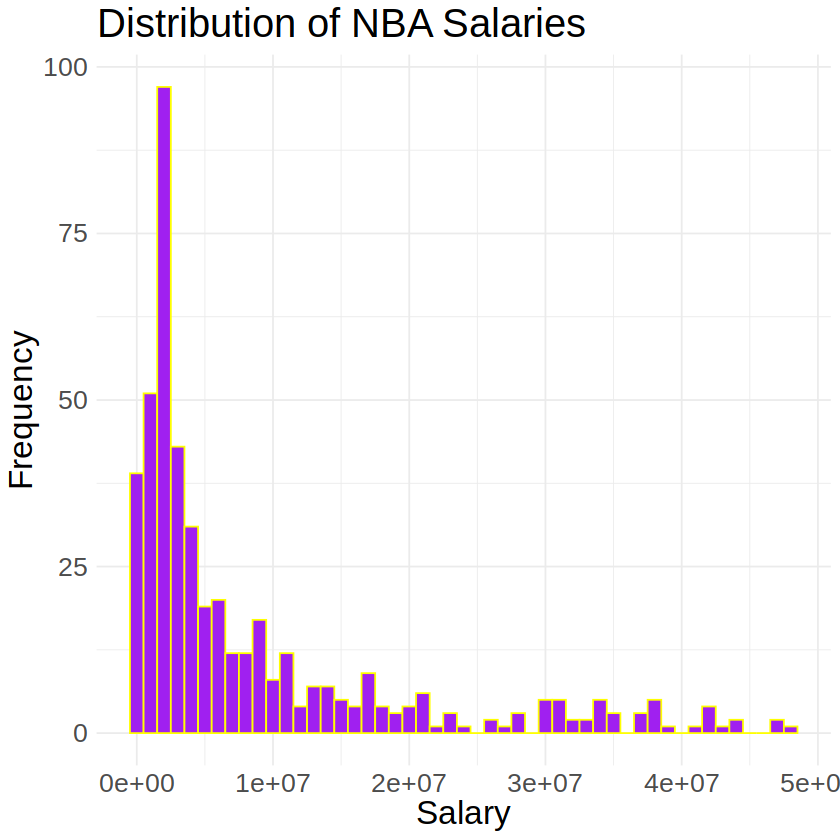

In [13]:
ggplot(NBA_salary_data, aes(x = Salary)) +
geom_histogram(binwidth = 1000000, fill = "purple", color = "yellow") +
theme_minimal() +
labs(title = "Distribution of NBA Salaries", x = "Salary", y = "Frequency") +
theme(text = element_text(size = 20))

This salary distributions shows us that the majority of NBA Players make around 500,000 - 1M USD per year, while there are a significantly small portion of players making around 30M to 50M. It is safe to say that most NBA Players are quite well off. This right-skewed distribution would normally be problematic for our regression model, but let's test it first and then see if it affects it. *EDIT

### 3. Correlation Analysis:
- Investigate the correlation between different performance metrics and salaries (correlation matrix)
- Identify top prospects for good salary predictors

Now that we have successfully loaded our dataset and tidied it up, we can now work on figuring out which statistics will most likely be good predictors for salary, and explore those further.

For example, we can generally assume that stats such as minutes played or steals per game will not be as influential on salary as points per game or win shares, but how would we be certain about which statistics are best predictors?

A common way of figuring out which two variables have a strong relationship between each other, especially in a setting such as ours where we are not quite sure what the nature of the relationship might be, is to use a correlation matrix (REF= https://towardsdatascience.com/correlation-matrix-demystified-3ae3405c86c1). This will tell us which variables have a strong correlation with each other, which is a good basis for further exploration. If we find some performance metrics have very low correlation with salary, we can effectively rule those out. 

In [14]:
target_performance_stats <- subset(NBA_salary_data, select = -c(Index, Position, Player_Name, Position, Team))

cor_matrix <- cor(target_performance_stats, use = "complete.obs")

Now, we have created the correlation matrix, let's try visualizing it with a heatmap. 

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


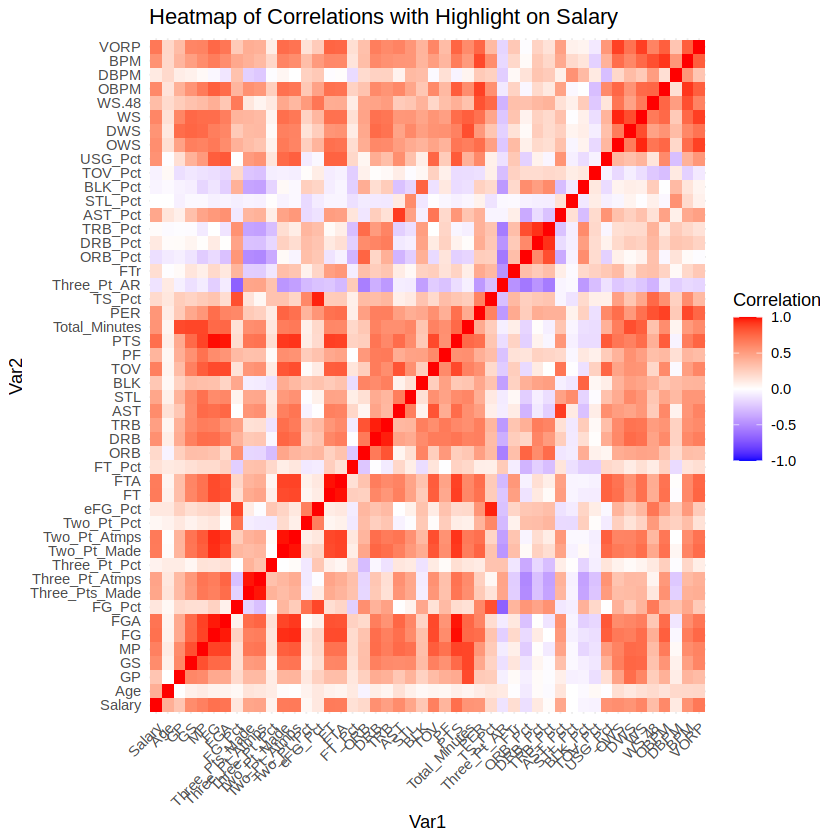

In [15]:
cor_long <- cor_matrix %>%
melt(cols = everything(), names_to = "Var2", values_to = "Correlation")

ggplot(cor_long, aes(x=Var1, y=Var2, fill=value)) +
geom_tile() +
scale_fill_gradient2(low = "blue", high = "red", mid = "white", midpoint = 0, limit = c(-1,1)) +
theme_minimal() +
theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
geom_vline(xintercept = which(names(cor_matrix) == "Salary"), color = "green", size = 1.5) +
  geom_hline(yintercept = which(names(cor_matrix) == "Salary"), color = "green", size = 1.5) +
  labs(fill = "Correlation", title = "Heatmap of Correlations with Highlight on Salary")

This is a great start. It looks very cool and colourful, but it is a bit hard to read. Since we are only interested in the correlations between performance stats and salary, we can isolate for these correlations, and rank them in descending order. 

In [16]:
salary_correlations <- cor_matrix["Salary", ]

sorted_salary_correlations <- sort(salary_correlations, decreasing = TRUE)

#sorted_salary_correlations


# Convert the sorted correlations to a data frame
sorted_salary_correlations_df <- data.frame(
  Variable = names(sorted_salary_correlations),
  Correlation = sorted_salary_correlations
)

# Print the data frame
print(sorted_salary_correlations_df)




                     Variable   Correlation
Salary                 Salary  1.0000000000
PTS                       PTS  0.7191173336
FG                         FG  0.7118509280
FGA                       FGA  0.6966823647
VORP                     VORP  0.6768492637
Two_Pt_Atmps     Two_Pt_Atmps  0.6715820234
Two_Pt_Made       Two_Pt_Made  0.6675550693
FT                         FT  0.6645510390
FTA                       FTA  0.6595895988
TOV                       TOV  0.6431081241
MP                         MP  0.6417385312
WS                         WS  0.6162372741
OBPM                     OBPM  0.6000296867
AST                       AST  0.5891035926
GS                         GS  0.5889257613
OWS                       OWS  0.5765526833
DRB                       DRB  0.5677576398
BPM                       BPM  0.5577456362
USG_Pct               USG_Pct  0.5565113689
DWS                       DWS  0.5498690356
Total_Minutes   Total_Minutes  0.5463765746
PER                       PER  0

Beautiful. Now we can see the top performance metrics that have the strongest correlation to salary. The number one statistic being PTS (Average points scored per game). 

Now, we have a few good stats to use when building our predictive model. 

To do a quick initial exploration of what the relationship would look like, let's plot the relationship between avergae points per game and salary.

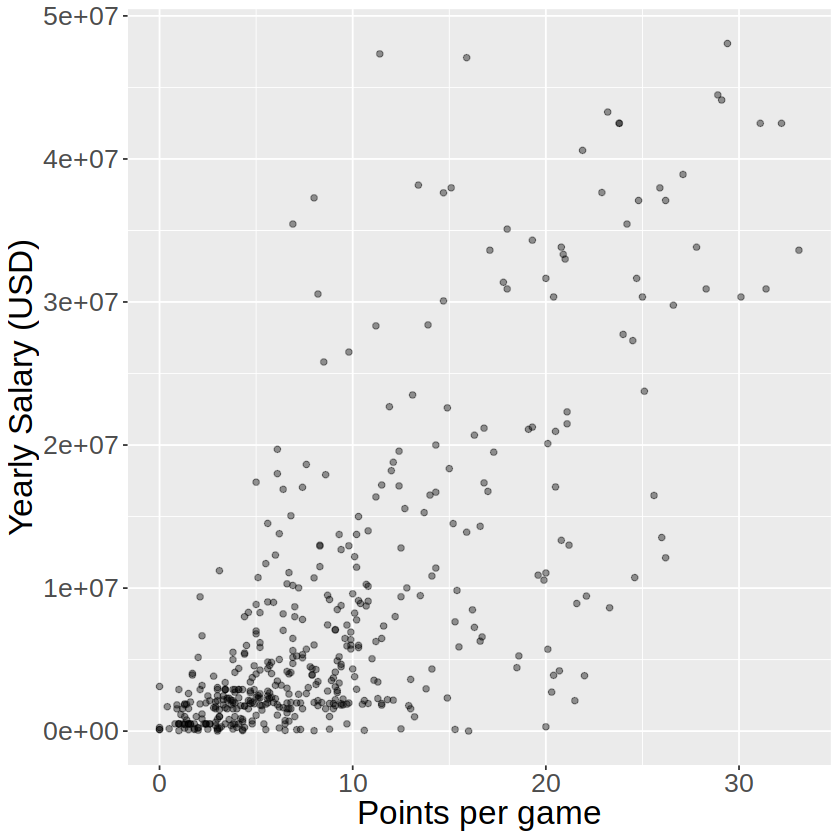

In [17]:
ppg_salary_relat <- ggplot(NBA_salary_data, aes(x = PTS, y = Salary)) +
geom_point(alpha = 0.4) +
xlab("Points per game") +
ylab("Yearly Salary (USD)") +
theme(text = element_text(size = 20))

ppg_salary_relat

This is very hopeful! We have a fairly strong correlation between PTS and Salary, and the plot of their relationship shows a decent linear relationship. We definitely have enough reason to attempt to build a predictive model based on the affect of PTS and Salary. 

### 4. Feature Selection:
- Based on the EDA and correlation analysis, select relevant features for modeling.
- Consider excluding columns that may not contribute to the prediction of salary

Let's begin by exploring an obvious relationship, the correlation between Points Per Game and Salary.

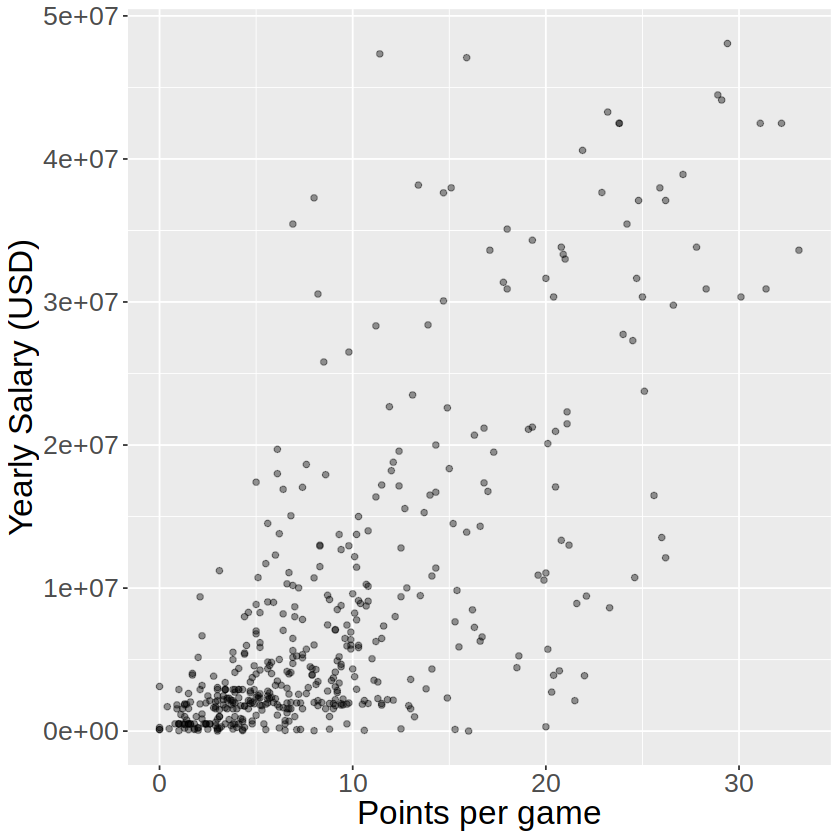

In [18]:
ppg_correlation <- ggplot(NBA_salary_data, aes(x = PTS, y = Salary)) +
geom_point(alpha = 0.4) +
xlab("Points per game") +
ylab("Yearly Salary (USD)") +
theme(text = element_text(size = 20))

ppg_correlation

Let's begin building our linear regression model!

First, we will split the data into training and testing sets. 

In [19]:
NBA_salary_split <- initial_split(NBA_salary_data, prop = 0.6, strata = Salary)
NBA_salary_train <- training(NBA_salary_split)
NBA_salary_test <- testing(NBA_salary_split)

We now have our training data, let's create the model specification and recipe, and fit our regression model accordingly. 

In [21]:

lm_spec <- linear_reg() %>%
set_engine("lm") %>%
set_mode("regression")

lm_recipe <- recipe(Salary ~ PTS, data = NBA_salary_train)

lm_fit <- workflow() %>%
add_recipe(lm_recipe) |>
add_model(lm_spec) |>
fit(data = NBA_salary_train)

lm_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
(Intercept)          PTS  
   -1607206      1108985  


### Analysis

In [32]:
R.version.string

[1] "R version 3.6.1 (2019-07-05)"

In [ ]:
##Test commit

### Discussion

### References